# Import das bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from pygmo import *
from scipy.stats import wilcoxon
from mpl_toolkits.mplot3d import Axes3D
import methods_updated as mt
%matplotlib inline

## Funções

In [123]:
def read_execution_times(file_path):
    file = open(file_path, 'r')
    file_lines = file.readlines()
    
    return [int(time) for time in file_lines]

def plot_hypervolume_convergence(file_path, folder, file, dimension, reference_point=None, plot=True):
    number_of_executions = 30
    file_path = file_path
    hv_df = pd.DataFrame()
    sizes = []
    for i in range(number_of_executions):
        file_name = file + str(i) + '.txt'

        f = open(os.path.join(file_path, folder, file_name),'r',encoding='utf-8')
#         print(os.path.join(file_path, folder, file_name))
        data = f.readlines()
        splitted_data = ' '.join([i for i in data]).split('#\n')
        splitted_data = [i for i in splitted_data if len(i) > 1]
        current_size = []
        hv_pareto = []
        indexes = []
        for k in range(len(splitted_data)):
            converted = [i.strip().split(',') for i in splitted_data[k].split('\n') if len(i) > 1]
            pop = [[float(j) for j in i] for i in converted]
            hv = hypervolume(pop)
            current_size.append(len(pop))
            if reference_point is None:
                hv_pareto.append(hv.compute([200000,150000,150000,150000,150000,150000,150000,1]))
            else:
                hv_pareto.append(hv.compute(reference_point))
            indexes.append(100*k)
        sizes.append(current_size)
        df = pd.DataFrame(data=[indexes, hv_pareto]).T
        columns_string = 'Evaluation HV'+str(i)
        df.columns = columns_string.split()
        hv_df = pd.concat([hv_df, df[columns_string.split()[1]]], axis=1, sort=False)
    if plot:
        hv_df.T.mean().plot(x='Evaluation', y='HV',figsize=(10,8))
    return hv_df.T.mean(), hv_df, sizes

def random_test(df1, df2, number_of_samples=30, plot_hist = True, bins=60, name=None):
    DORAND = 5000
    
    spread2 = df2.values
    spread1 = df1.values
    
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)
    
    totalSpread = np.append(spread1.tolist(), spread2.tolist())
    
    randMedianSpreadDiff = np.nan * np.ones((DORAND,1))
    randMeanSpreadDiff = np.nan * np.ones((DORAND,1))
    
    for randPool in range(0, DORAND-1):
        new1Index = np.random.permutation(number_of_samples)
        newSpread1 = totalSpread[new1Index[0:int(number_of_samples/2)]]
        newSpread2 = totalSpread[new1Index[int(number_of_samples/2):number_of_samples]]
        
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)
        
    randMedianSpreadDiff[DORAND - 1] = medianSpreadDiff
    randMeanSpreadDiff[DORAND - 1] = meanSpreadDiff
    
    z = (meanSpreadDiff - np.mean(randMeanSpreadDiff) )/ np.std(randMeanSpreadDiff)
        
    limiar = 1.96 * np.std(randMeanSpreadDiff) + np.mean(randMeanSpreadDiff)
    
    if z <= -1.96:
        print('H1-')
    elif z >= 1.96:
        print('H1+')
    else:
        print('H0')
    print('Limiar =',limiar)
    print('z =',z)
    print('Mean Spread Diff',meanSpreadDiff)
    if plot_hist:
        plt.figure(figsize=(9,6))
        plt.hist(randMeanSpreadDiff, bins=bins, color='gray', label='Distribution')
        plt.plot([meanSpreadDiff], [0], color='black', marker='x', markersize=12, clip_on=False)
        plt.plot([limiar], [0], color='black', marker='o', markersize=12, clip_on=False)
        plt.plot([-limiar], [0], color='black', marker='o', markersize=12, clip_on=False)
        plt.scatter(x=meanSpreadDiff, y=0, color='black', marker='x', s=100, label='Observed Mean Difference')
        plt.scatter(x=limiar, y=0, color='black', s=100, label='Confidence Limiars (95%)')
        plt.xticks(fontsize=(15))
        plt.yticks(fontsize=(15))
        plt.legend(fontsize = 'large')
        if name is not None:
            fig = plt.gcf()
            plt.show()
            fig.savefig(name, format=name.split('.')[1])
        else:
            plt.show()

In [124]:
last_evaluation = 598

# 50 solicitações

In [151]:
instance = 'r050n12tw10k4'

# OnCl$\tau$-MOEA/D

In [152]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r050, hv_moead_kendall_r050_df, kendall_r050 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [153]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r050, hv_moead_pearson_r050_df, pearson_r050 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [154]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r050, hv_moead_r2_r050_df, offline_r050 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [155]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r050, hv_moead_r8_r050_df, moead_r050 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Boxplot do Hipervolume - 50 solicitações 

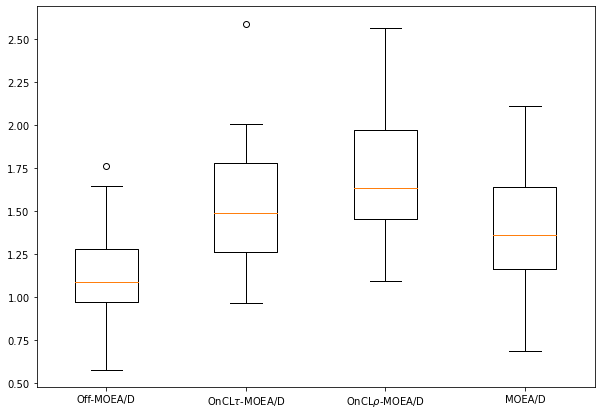

In [156]:
data_to_plot = [hv_moead_r2_r050_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_kendall_r050_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_pearson_r050_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_r8_r050_df.iloc[last_evaluation:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

H1+
Limiar = 0.24148070119965634
z = 3.0018049091620287
Mean Spread Diff 0.3696614683777869


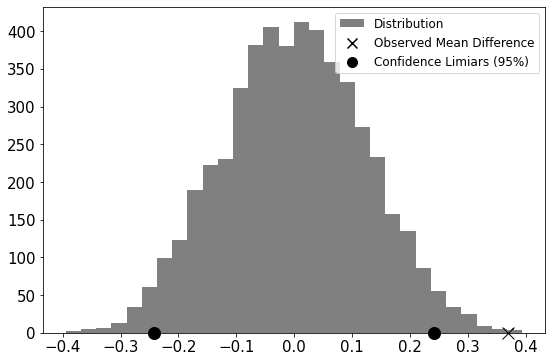

CPU times: user 2.06 s, sys: 176 ms, total: 2.24 s
Wall time: 2 s


In [10]:
%%time
random_test(hv_moead_r2_r050_df.iloc[last_evaluation],
               hv_moead_kendall_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_kendall_r050.pdf')

H1+
Limiar = 0.24299107944266002
z = 3.810529547349487
Mean Spread Diff 0.47321595538197847


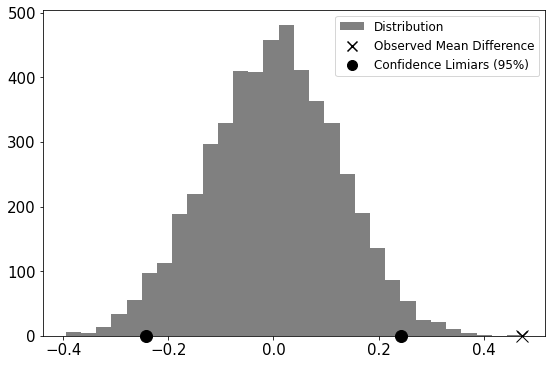

CPU times: user 1.88 s, sys: 172 ms, total: 2.05 s
Wall time: 1.8 s


In [11]:
%%time
random_test(hv_moead_r2_r050_df.iloc[last_evaluation],
               hv_moead_pearson_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_pearson_r050.pdf')

H1+
Limiar = 0.24295886619552082
z = 2.225542067388227
Mean Spread Diff 0.275904743753277


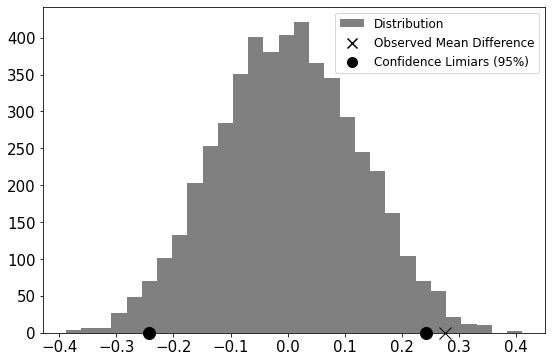

CPU times: user 1.95 s, sys: 180 ms, total: 2.13 s
Wall time: 1.88 s


In [12]:
%%time
random_test(hv_moead_r2_r050_df.iloc[last_evaluation],
               hv_moead_r8_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_moead_r050.pdf')

H0
Limiar = 0.2772131158212908
z = 0.9677836949722469
Mean Spread Diff 0.1362440581446429


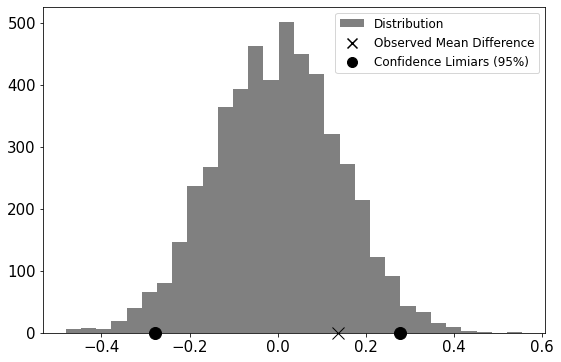

CPU times: user 2.03 s, sys: 164 ms, total: 2.2 s
Wall time: 1.95 s


In [136]:
%%time
random_test(hv_moead_r8_r050_df.iloc[last_evaluation],
               hv_moead_kendall_r050_df.iloc[last_evaluation],
               30,
               True,
               bins=30,
               name='moead_kendall_r050.pdf')

H0
Limiar = 0.26315278218252086
z = 1.4654649121744148
Mean Spread Diff 0.19731121162870147


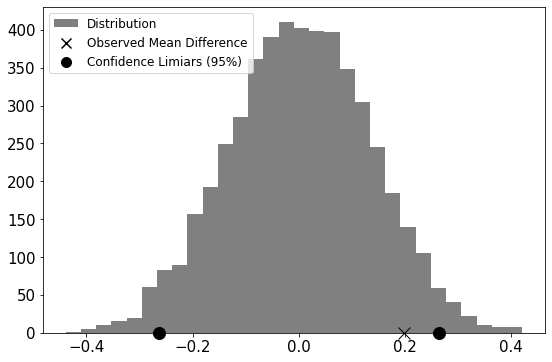

CPU times: user 2.03 s, sys: 188 ms, total: 2.21 s
Wall time: 1.95 s


In [14]:
%%time
random_test(hv_moead_r8_r050_df.iloc[last_evaluation],
               hv_moead_pearson_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='moead_pearson_r050.pdf')

H0
Limiar = 0.279668215580081
z = 0.7223431997277318
Mean Spread Diff 0.10355448700419156


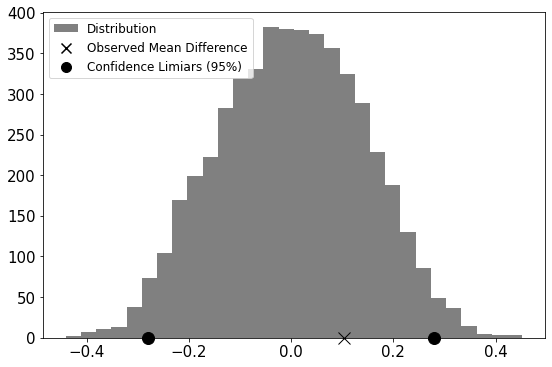

CPU times: user 1.98 s, sys: 180 ms, total: 2.16 s
Wall time: 1.98 s


In [15]:
%%time
random_test(hv_moead_kendall_r050_df.iloc[last_evaluation],
               hv_moead_pearson_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='kendall_pearson_r050.pdf')

In [157]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r100n12tw10k4'

# OnCl$\tau$-MOEA/D

In [158]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r100, hv_moead_kendall_r100_df, kendall_r100 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [159]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r100, hv_moead_pearson_r100_df, pearson_r100 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [160]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r100, hv_moead_r2_r100_df, offline_r100 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [161]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r100, hv_moead_r8_r100_df, moead_r100 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

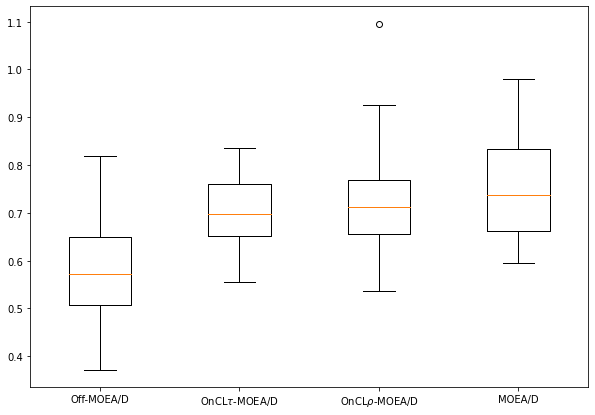

In [162]:
data_to_plot = [hv_moead_r2_r100_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_kendall_r100_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_pearson_r100_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_r8_r100_df.iloc[last_evaluation:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

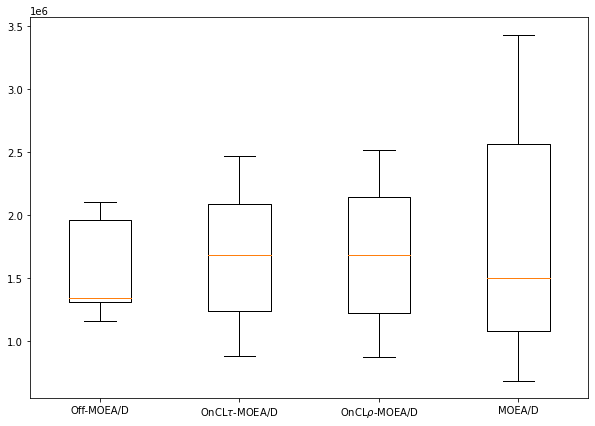

In [22]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.07590026437882923
z = 3.8063049058565865
Mean Spread Diff 0.14750224524006111


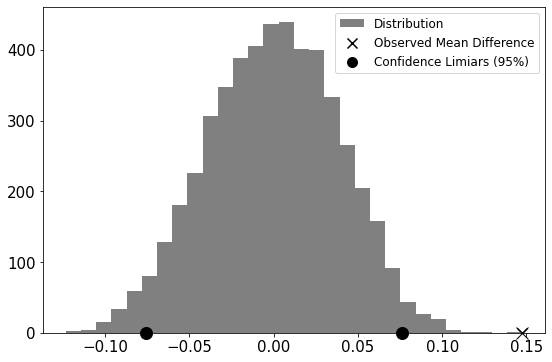

CPU times: user 2.08 s, sys: 136 ms, total: 2.22 s
Wall time: 1.99 s


In [23]:
%%time
random_test(hv_moead_r2_r100_df.iloc[last_evaluation],
               hv_moead_kendall_r100_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_kendall_r100.pdf')

H1+
Limiar = 0.07747017587642822
z = 3.4949105432877685
Mean Spread Diff 0.13796987668458366


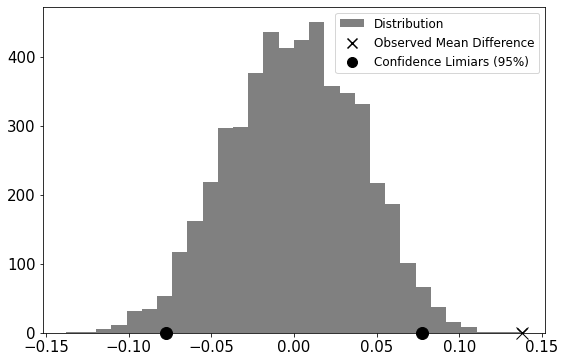

CPU times: user 1.92 s, sys: 164 ms, total: 2.08 s
Wall time: 1.83 s


In [24]:
%%time
random_test(hv_moead_r2_r100_df.iloc[599:],
               hv_moead_pearson_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_pearson_r100.pdf')

H1+
Limiar = 0.07732315216627902
z = 4.33305360479282
Mean Spread Diff 0.1718041332986348


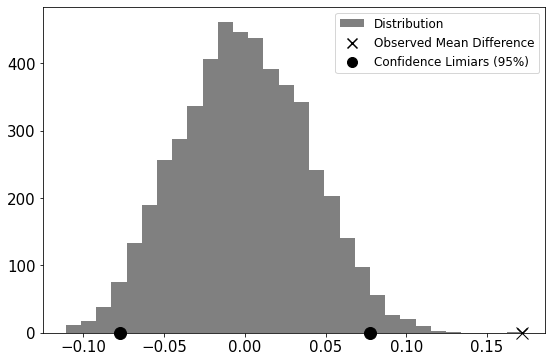

CPU times: user 1.92 s, sys: 172 ms, total: 2.09 s
Wall time: 1.85 s


In [25]:
%%time
random_test(hv_moead_r2_r100_df.iloc[599:],
               hv_moead_r8_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_moead_r100.pdf')

H0
Limiar = 0.06499372049703339
z = -1.838570045733417
Mean Spread Diff -0.061905281019089764


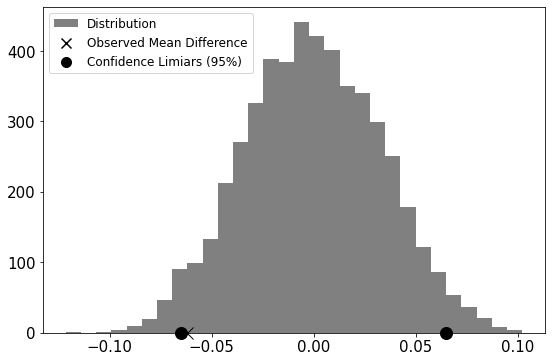

CPU times: user 1.98 s, sys: 156 ms, total: 2.13 s
Wall time: 1.87 s


In [26]:
%%time
random_test(hv_moead_r8_r100_df.iloc[599:],
               hv_moead_kendall_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='moead_kendall_r100.pdf')

H0
Limiar = 0.0649963252912713
z = -1.021233384657096
Mean Spread Diff -0.03383425661405115


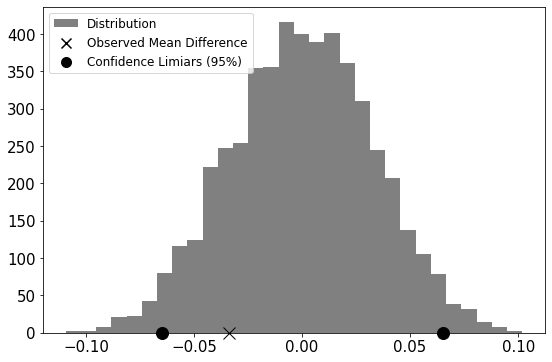

CPU times: user 2.14 s, sys: 128 ms, total: 2.27 s
Wall time: 2 s


In [27]:
%%time
random_test(hv_moead_r8_r100_df.iloc[599:],
               hv_moead_pearson_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='moead_pearson_r100.pdf')

H0
Limiar = 0.05942009733051139
z = 0.9241506624278433
Mean Spread Diff 0.028071024405038614


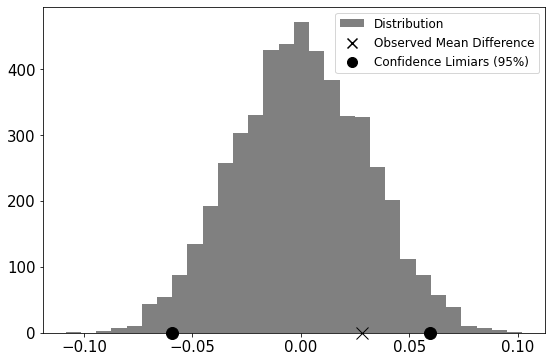

CPU times: user 1.96 s, sys: 180 ms, total: 2.14 s
Wall time: 1.88 s


In [28]:
%%time
random_test(hv_moead_kendall_r100_df.iloc[599:],
               hv_moead_pearson_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='kendall_pearson_r100.pdf')

In [164]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r150n12tw10k4'

# OnCl$\tau$-MOEA/D

In [165]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r150, hv_moead_kendall_r150_df, kendall_r150 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [166]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r150, hv_moead_pearson_r150_df, pearson_r150 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [167]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r150, hv_moead_r2_r150_df, offline_r150 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [168]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r150, hv_moead_r8_r150_df, moead_r150 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

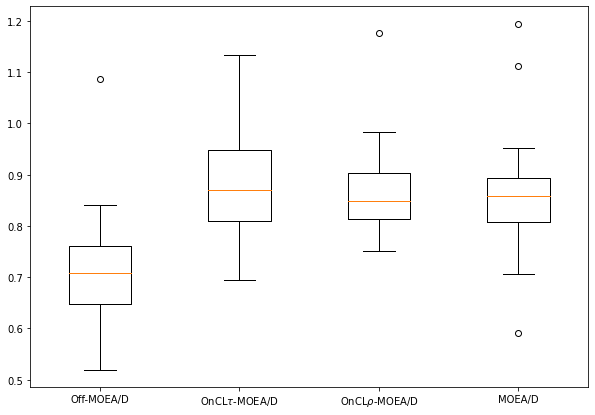

In [169]:
data_to_plot = [hv_moead_r2_r150_df.iloc[598:].values.tolist()[0],
                hv_moead_kendall_r150_df.iloc[598:].values.tolist()[0],
                hv_moead_pearson_r150_df.iloc[598:].values.tolist()[0],
                hv_moead_r8_r150_df.iloc[598:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

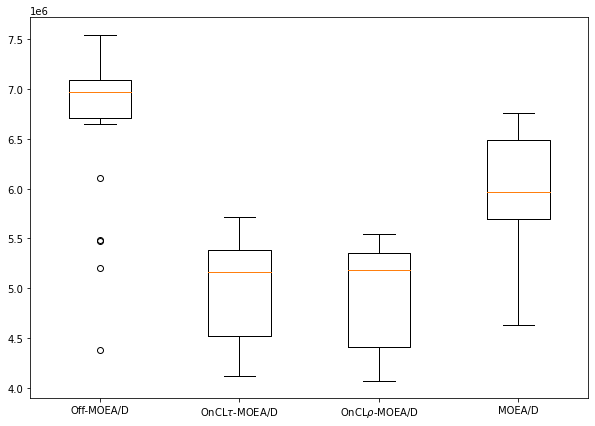

In [35]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.08665710786923962
z = 3.0545996338508585
Mean Spread Diff 0.13504617394971452


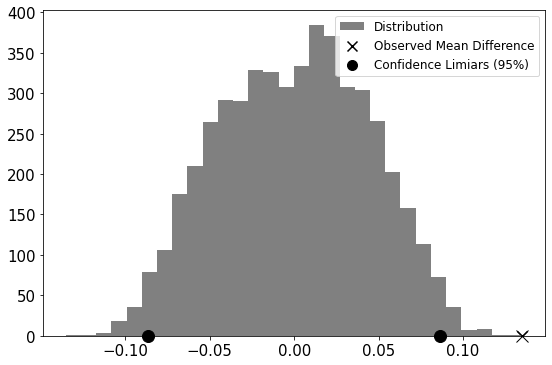

CPU times: user 1.96 s, sys: 164 ms, total: 2.13 s
Wall time: 1.87 s


In [36]:
%%time
random_test(hv_moead_r2_r150_df.iloc[599:],
               hv_moead_kendall_r150_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_kendall_r150.pdf')

H1+
Limiar = 0.08702050561467575
z = 2.175234491176527
Mean Spread Diff 0.096535959454361


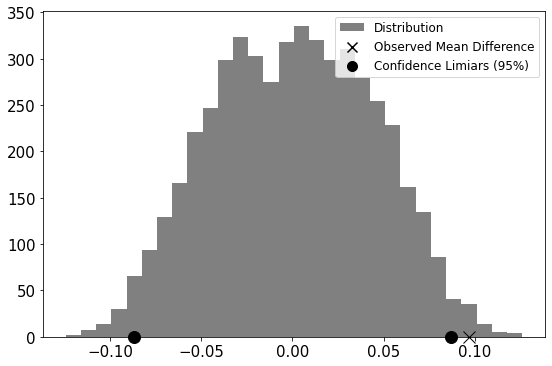

CPU times: user 2.03 s, sys: 180 ms, total: 2.21 s
Wall time: 1.95 s


In [37]:
%%time
random_test(hv_moead_r2_r150_df.iloc[599:],
               hv_moead_pearson_r150_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_pearson_r150.pdf')

H1+
Limiar = 0.0860526832693445
z = 2.854816963211623
Mean Spread Diff 0.12553807770308656


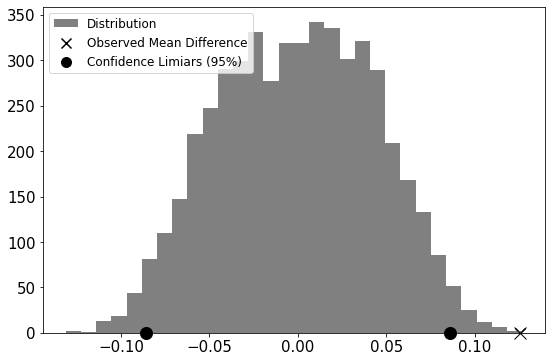

CPU times: user 1.96 s, sys: 156 ms, total: 2.12 s
Wall time: 1.86 s


In [38]:
%%time
random_test(hv_moead_r2_r150_df.iloc[599:],
               hv_moead_r8_r150_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_moead_r150.pdf')

H0
Limiar = 0.06844924192827034
z = 0.8546881833306853
Mean Spread Diff 0.029657800301605586


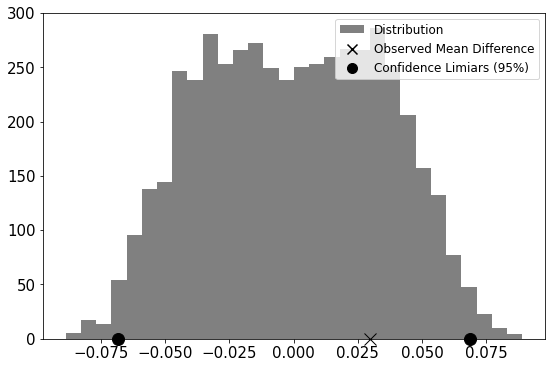

CPU times: user 1.97 s, sys: 168 ms, total: 2.14 s
Wall time: 1.89 s


In [39]:
%%time
random_test(hv_moead_r8_r150_df.iloc[598],
               hv_moead_kendall_r150_df.iloc[598],
               21,
               True,
               bins=30,
               name='moead_kendall_r150.pdf')

H0
Limiar = 0.06923223600491261
z = 0.16688985150368282
Mean Spread Diff 0.006072586891984977


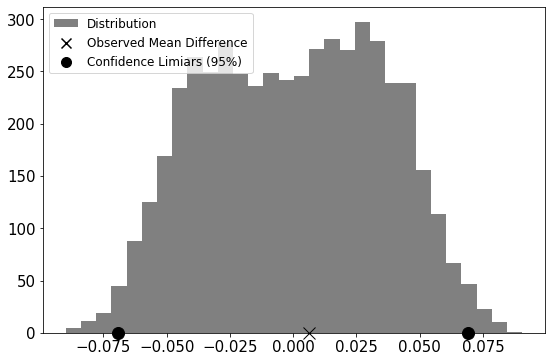

CPU times: user 1.98 s, sys: 168 ms, total: 2.15 s
Wall time: 1.9 s


In [40]:
%%time
random_test(hv_moead_r8_r150_df.iloc[598],
               hv_moead_pearson_r150_df.iloc[598],
               21,
               True,
               bins=30,
               name='moead_pearson_r150.pdf')

H0
Limiar = 0.08857204012964234
z = -0.6924564580018852
Mean Spread Diff -0.031047713952487066


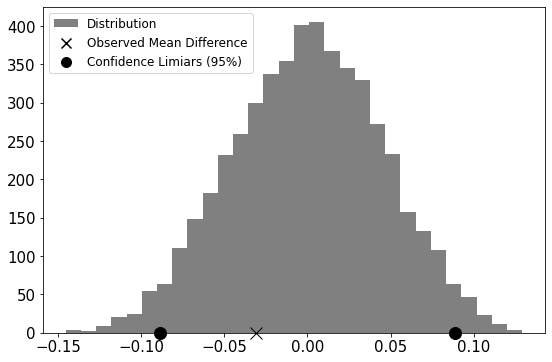

CPU times: user 1.93 s, sys: 176 ms, total: 2.11 s
Wall time: 1.85 s


In [41]:
%%time
random_test(hv_moead_kendall_r150_df.iloc[598:],
               hv_moead_pearson_r150_df.iloc[598:],
               21,
               True,
               bins=30,
               name='kendall_pearson_r150.pdf')

In [172]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r200n12tw10k4'

# OnCl$\tau$-MOEA/D

In [173]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r200, hv_moead_kendall_r200_df, kendall_r200 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [174]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r200, hv_moead_pearson_r200_df, pearson_r200 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [175]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r200, hv_moead_r2_r200_df, offline_r200 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [177]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.11, 1.15, 1.17, 1.17, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r200, hv_moead_r8_r200_df, moead_r200 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

In [191]:
a = hv_moead_r8_r200_df.iloc[598]
a = a[~a.isna()]

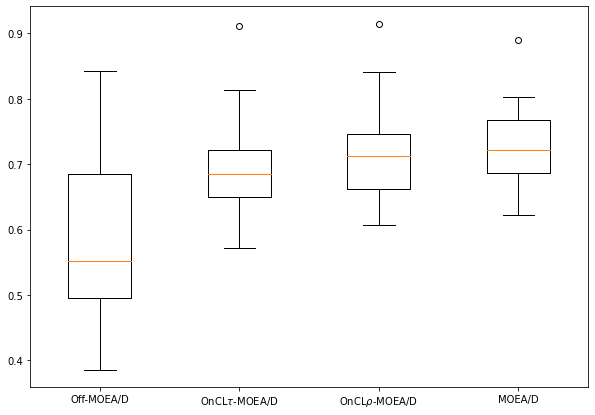

In [192]:
data_to_plot = [hv_moead_r2_r200_df.iloc[598:].values.tolist()[0],
                hv_moead_kendall_r200_df.iloc[598:].values.tolist()[0],
                hv_moead_pearson_r200_df.iloc[598:].values.tolist()[0],
                a
#                 hv_moead_r8_r200_df.iloc[598:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

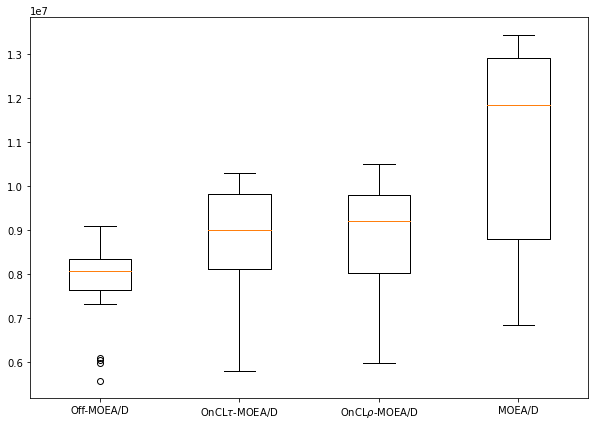

In [48]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.08453051588686594
z = 2.4086948264424355
Mean Spread Diff 0.10420990251910145


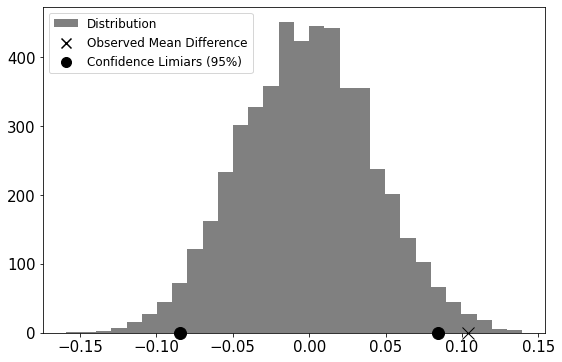

CPU times: user 2.04 s, sys: 152 ms, total: 2.19 s
Wall time: 1.95 s


In [194]:
%%time
random_test(hv_moead_r2_r200_df.iloc[598],
               hv_moead_kendall_r200_df.iloc[598],
               30,
               True,
               bins=30,
               name='off_kendall_r200.pdf')

In [50]:
hv_moead_r2_r200_df.iloc[598:].values.tolist()[0]

[0.37958439910107517,
 0.4584476162280708,
 0.4371743295737677,
 0.3516424159287416,
 0.3559124980140027,
 0.4573633886147521,
 0.5979406013580993,
 0.4502514527003125,
 0.5774205758189721,
 0.5468842344371536,
 0.5421318407604765,
 0.740638649546656,
 0.6425849682269427,
 0.32913743755910707,
 0.6202715818042928,
 0.47185942664723113,
 0.6001004718664632,
 0.44461159837779407,
 0.47058945872462843,
 0.6795403330627658,
 0.41001546897420804]

In [51]:
np.sort(hv_moead_r2_r200_df.iloc[598].values)

array([0.32913744, 0.35164242, 0.3559125 , 0.3795844 , 0.41001547,
       0.43717433, 0.4446116 , 0.45025145, 0.45736339, 0.45844762,
       0.47058946, 0.47185943, 0.54213184, 0.54688423, 0.57742058,
       0.5979406 , 0.60010047, 0.62027158, 0.64258497, 0.67954033,
       0.74063865])

In [52]:
np.sort(hv_moead_kendall_r200_df.iloc[598].values)

array([0.49945959, 0.49984067, 0.53342506, 0.53778981, 0.54786432,
       0.5603309 , 0.56207623, 0.57378607, 0.58775398, 0.58877773,
       0.59145024, 0.60216604, 0.61806368, 0.62076013, 0.63173568,
       0.6486332 , 0.65526606, 0.65917277, 0.65980218, 0.71302296,
       0.79887231])

H1+
Limiar = 0.08687739682647316
z = 2.9211820703498166
Mean Spread Diff 0.12921115550796025


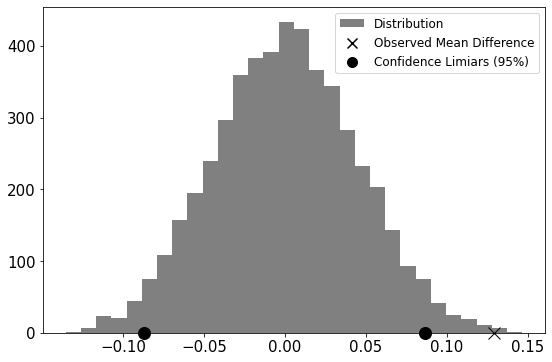

CPU times: user 2.12 s, sys: 160 ms, total: 2.28 s
Wall time: 2.06 s


In [196]:
%%time
random_test(hv_moead_r2_r200_df.iloc[598],
               hv_moead_pearson_r200_df.iloc[598],
               30,
               True,
               bins=30,
               name='off_pearson_r200.pdf')

H0
Limiar = nan
z = nan
Mean Spread Diff nan


/home/renansantos/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/renansantos/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


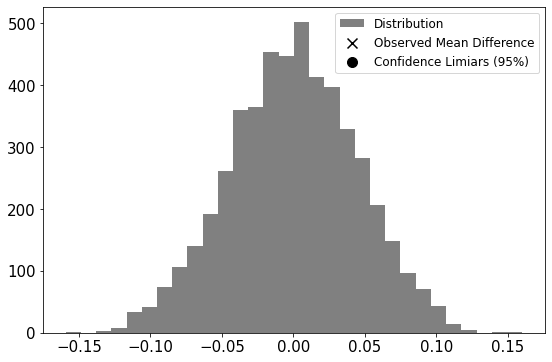

CPU times: user 2.05 s, sys: 136 ms, total: 2.18 s
Wall time: 1.92 s


In [199]:
%%time
random_test(hv_moead_r2_r200_df.iloc[598:],
               hv_moead_r8_r200_df.iloc[598:],
               29,
               True,
               bins=30,
               name='off_moead_r200.pdf')

H0
Limiar = nan
z = nan
Mean Spread Diff nan


/home/renansantos/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6619: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/renansantos/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

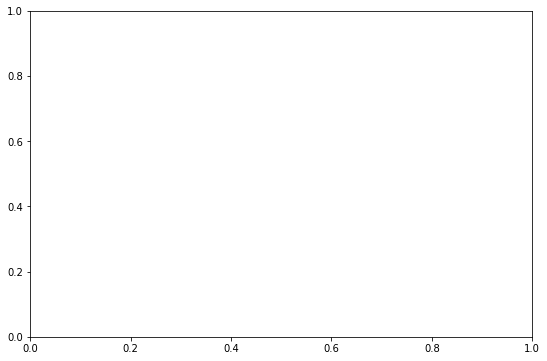

In [200]:
%%time
random_test(hv_moead_r8_r200_df.iloc[598:],
               hv_moead_kendall_r200_df.iloc[598:],
               30,
               True,
               bins=30,
               name='moead_kendall_r200.pdf')

H0
Limiar = 0.03789602066323137
z = -1.0960368432696657
Mean Spread Diff -0.02052774395239243


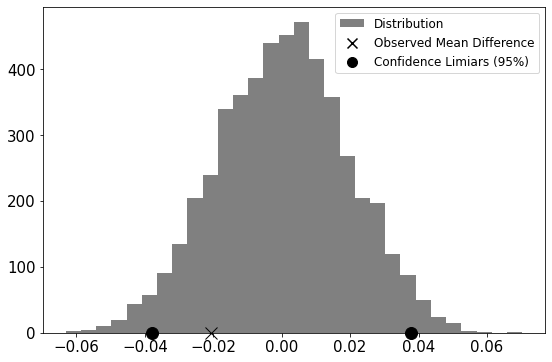

CPU times: user 2.01 s, sys: 168 ms, total: 2.18 s
Wall time: 1.93 s


In [56]:
%%time
random_test(hv_moead_r8_r200_df.iloc[598:],
               hv_moead_pearson_r200_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_pearson_r200.pdf')

H0
Limiar = 0.06139615770800712
z = 0.4066484659580591
Mean Spread Diff 0.013272605301589468


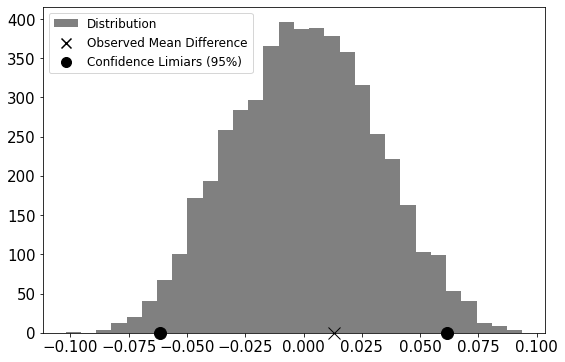

CPU times: user 2.1 s, sys: 156 ms, total: 2.26 s
Wall time: 1.99 s


In [57]:
%%time
random_test(hv_moead_kendall_r200_df.iloc[598],
               hv_moead_pearson_r200_df.iloc[598],
               21,
               True,
               bins=30,
               name='kendall_pearson_r200.pdf')

In [58]:
# stat, p = wilcoxon(hv_moead_kendall_r050_df.iloc[300:], hv_moead_pearson_r050_df.iloc[300:])
# print('Statistics=%.3f, p=%.3f' % (stat, p))

# alpha = 0.05
# if p > alpha:
# 	print('Same distribution (fail to reject H0)')
# else:
# 	print('Different distribution (reject H0)')

In [59]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r250n12tw10k4'

# OnCl$\tau$-MOEA/D

In [60]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r250, hv_moead_kendall_r250_df, kendall_r250 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

ValueError: too many values to unpack (expected 2)

# OnCl$\rho$-MOEA/D

In [ ]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r250, hv_moead_pearson_r250_df, pearson_r200 = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [ ]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r250, hv_moead_r2_r250_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [ ]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r250, hv_moead_r8_r250_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

In [ ]:
data_to_plot = [hv_moead_r2_r250_df.iloc[598:].values.tolist()[0],
                hv_moead_kendall_r250_df.iloc[598:].values.tolist()[0],
                hv_moead_pearson_r250_df.iloc[598:].values.tolist()[0],
                hv_moead_r8_r250_df.iloc[598:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

In [ ]:
%%time
random_test(hv_moead_r2_r250_df.iloc[598],
               hv_moead_kendall_r250_df.iloc[598],
               21,
               True,
               bins=30,
               name='off_kendall_r250.pdf')

In [ ]:
hv_moead_r2_r250_df.iloc[598:].values.tolist()[0]

In [ ]:
np.sort(hv_moead_r2_r250_df.iloc[598].values)

In [ ]:
np.sort(hv_moead_kendall_r250_df.iloc[598].values)

In [ ]:
%%time
random_test(hv_moead_r2_r250_df.iloc[598],
               hv_moead_pearson_r250_df.iloc[598],
               21,
               True,
               bins=30,
               name='off_pearson_r250.pdf')

In [ ]:
%%time
random_test(hv_moead_r2_r250_df.iloc[598:],
               hv_moead_r8_r250_df.iloc[598:],
               21,
               True,
               bins=30,
               name='off_moead_r250.pdf')

In [ ]:
%%time
random_test(hv_moead_r8_r250_df.iloc[598:],
               hv_moead_kendall_r250_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_kendall_r250.pdf')

In [ ]:
%%time
random_test(hv_moead_r8_r250_df.iloc[598:],
               hv_moead_pearson_r250_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_pearson_r250.pdf')

In [ ]:
%%time
random_test(hv_moead_kendall_r250_df.iloc[598],
               hv_moead_pearson_r250_df.iloc[598],
               21,
               True,
               bins=30,
               name='kendall_pearson_r250.pdf')

In [ ]:
from scipy.stats import wilcoxon

def get_interpretation(p):
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [ ]:
def compare_with_wilcoxon_test(hv_moead_r2_df, hv_moead_kendall_df,
                               hv_moead_pearson_df, hv_moead_r8_df):    
    print('\nOffline X Kendall')
    stat, p = wilcoxon(hv_moead_r2_df.iloc[last_evaluation], hv_moead_kendall_df.iloc[last_evaluation])
    get_interpretation(p)

    print('\nOffline X Pearson')
    stat, p = wilcoxon(hv_moead_r2_df.iloc[last_evaluation], hv_moead_pearson_df.iloc[last_evaluation])
    get_interpretation(p)

    print('\nOffline X MOEAD')
    stat, p = wilcoxon(hv_moead_r2_df.iloc[last_evaluation], hv_moead_r8_df.iloc[last_evaluation])
    get_interpretation(p)

    print('\nKendall X MOEAD')
    stat, p = wilcoxon(hv_moead_kendall_df.iloc[last_evaluation], hv_moead_r8_df.iloc[last_evaluation])
    get_interpretation(p)

    print('\nPearson X MOEAD')
    stat, p = wilcoxon(hv_moead_kendall_df.iloc[last_evaluation], hv_moead_r8_df.iloc[last_evaluation])
    get_interpretation(p)

    print('\nKendall X Pearson')
    stat, p = wilcoxon(hv_moead_kendall_df.iloc[last_evaluation], hv_moead_pearson_df.iloc[last_evaluation])
    get_interpretation(p)

# 50 solicitações

In [ ]:
compare_with_wilcoxon_test(hv_moead_r2_r050_df, hv_moead_kendall_r050_df, hv_moead_pearson_r050_df,
                           hv_moead_r8_r050_df)

# 100 solicitações

In [ ]:
compare_with_wilcoxon_test(hv_moead_r2_r100_df, hv_moead_kendall_r100_df, hv_moead_pearson_r100_df,
                           hv_moead_r8_r100_df)

# 150 solicitações

In [ ]:
compare_with_wilcoxon_test(hv_moead_r2_r150_df, hv_moead_kendall_r150_df, hv_moead_pearson_r150_df,
                           hv_moead_r8_r150_df)

# 200 solicitações

In [ ]:
compare_with_wilcoxon_test(hv_moead_r2_r200_df, hv_moead_kendall_r200_df, hv_moead_pearson_r200_df,
                           hv_moead_r8_r200_df)

# 250 solicitações

In [ ]:
compare_with_wilcoxon_test(hv_moead_r2_r250_df, hv_moead_kendall_r250_df, hv_moead_pearson_r250_df,
                           hv_moead_r8_r250_df)

In [63]:
kendall_r200

[[9,
  16,
  16,
  16,
  15,
  16,
  17,
  19,
  19,
  18,
  19,
  19,
  19,
  19,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  16,
  16,
  16,
  16,
  16,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  14,
  14,
  11,
  12,
  12,
  13,
  13,
  13,
  13,
  14,
  14,
  14,
  14,
  14,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  16,
  16,
  16,
  16,
  16,
  15,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,

In [74]:
path = '/home/renansantos/Área de Trabalho/Doutorado/PhD_2019_01/PhD_2019_01/number_of_solutions/'
columns = [i for i in range(598)]
pd.DataFrame(kendall_r050)[columns].to_csv(os.path.join(path, 'kendall_r050.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(pearson_r050)[columns].to_csv(os.path.join(path, 'pearson_r050.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(offline_r050)[columns].to_csv(os.path.join(path, 'offline_r050.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(moead_r050)[columns].to_csv(os.path.join(path, 'moead_r050.csv'),
                                           encoding='utf-8', sep=',')


pd.DataFrame(kendall_r100)[columns].to_csv(os.path.join(path, 'kendall_r100.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(pearson_r100)[columns].to_csv(os.path.join(path, 'pearson_r100.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(offline_r100)[columns].to_csv(os.path.join(path, 'offline_r100.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(moead_r100)[columns].to_csv(os.path.join(path, 'moead_r100.csv'),
                                           encoding='utf-8', sep=',')


pd.DataFrame(kendall_r150)[columns].to_csv(os.path.join(path, 'kendall_r150.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(pearson_r150)[columns].to_csv(os.path.join(path, 'pearson_r150.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(offline_r150)[columns].to_csv(os.path.join(path, 'offline_r150.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(moead_r150)[columns].to_csv(os.path.join(path, 'moead_r150.csv'),
                                           encoding='utf-8', sep=',')


pd.DataFrame(kendall_r200)[columns].to_csv(os.path.join(path, 'kendall_r200.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(pearson_r200)[columns].to_csv(os.path.join(path, 'pearson_r200.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(offline_r200)[columns].to_csv(os.path.join(path, 'offline_r200.csv'),
                                           encoding='utf-8', sep=',')
pd.DataFrame(moead_r200)[columns].to_csv(os.path.join(path, 'moead_r200.csv'),
                                           encoding='utf-8', sep=',')

In [205]:
kendall_r050 = pd.DataFrame(kendall_r050)[columns]
pearson_r050 = pd.DataFrame(pearson_r050)[columns]
offline_r050 = pd.DataFrame(offline_r050)[columns]
moead_r050 = pd.DataFrame(moead_r050)[columns]

kendall_r100 = pd.DataFrame(kendall_r100)[columns]
pearson_r100 = pd.DataFrame(pearson_r100)[columns]
offline_r100 = pd.DataFrame(offline_r100)[columns]
moead_r100 = pd.DataFrame(moead_r100)[columns]

kendall_r150 = pd.DataFrame(kendall_r150)[columns]
pearson_r150 = pd.DataFrame(pearson_r150)[columns]
offline_r150 = pd.DataFrame(offline_r150)[columns]
moead_r150 = pd.DataFrame(moead_r150)[columns]

kendall_r200 = pd.DataFrame(kendall_r200)[columns]
pearson_r200 = pd.DataFrame(pearson_r200)[columns]
offline_r200 = pd.DataFrame(offline_r200)[columns]
moead_r200 = pd.DataFrame(moead_r200)[columns]

In [100]:
last = 587
r050 = pd.DataFrame([offline_r050[last], kendall_r050[last], pearson_r050[last], moead_r050[last]]).T
r050.columns = 'Offline Kendall Pearson MOEAD'.split()
r050.to_csv(os.path.join(path, 'r050.csv'), encoding='utf-8', sep=',', index=False)

r100 = pd.DataFrame([offline_r100[last], kendall_r100[last], pearson_r100[last], moead_r100[last]]).T
r100.columns = 'Offline Kendall Pearson MOEAD'.split()
r100.to_csv(os.path.join(path, 'r100.csv'), encoding='utf-8', sep=',', index=False)

r150 = pd.DataFrame([offline_r150[last], kendall_r150[last], pearson_r150[last], moead_r150[last]]).T
r150.columns = 'Offline Kendall Pearson MOEAD'.split()
r150.to_csv(os.path.join(path, 'r150.csv'), encoding='utf-8', sep=',', index=False)

r200 = pd.DataFrame([offline_r200[last], kendall_r200[last], pearson_r200[last], moead_r200[last]]).T
r200.columns = 'Offline Kendall Pearson MOEAD'.split()
r200.to_csv(os.path.join(path, 'r200.csv'), encoding='utf-8', sep=',', index=False)

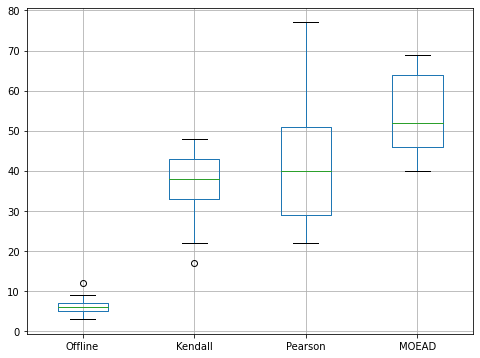

In [110]:
r050.boxplot(figsize=(8,6))
fig = plt.gcf()
plt.show()

fig.savefig(os.path.join(path, 'r050_boxplot.pdf'), format=name.split('.')[1])

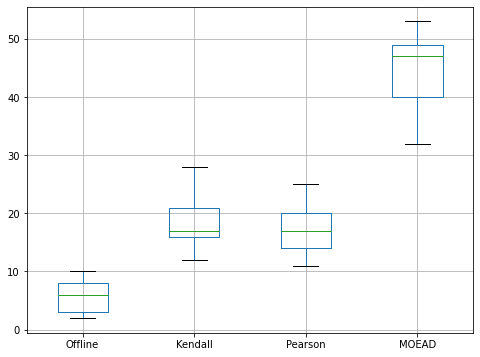

In [107]:
r100.boxplot(figsize=(8,6))
fig = plt.gcf()
plt.show()

fig.savefig(os.path.join(path, 'r100_boxplot.pdf'), format=name.split('.')[1])

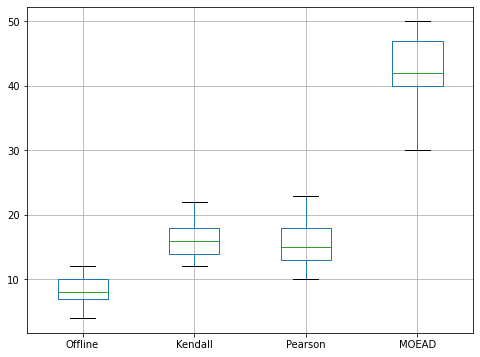

In [108]:
r150.boxplot(figsize=(8,6))
fig = plt.gcf()
plt.show()

fig.savefig(os.path.join(path, 'r150_boxplot.pdf'), format=name.split('.')[1])

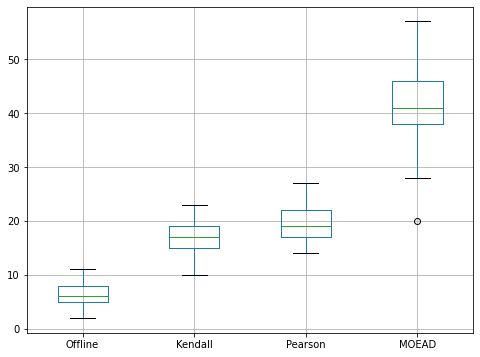

In [111]:
r200.boxplot(figsize=(8,6))
fig = plt.gcf()
plt.show()

fig.savefig(os.path.join(path, 'r200_boxplot.pdf'), format=name.split('.')[1])

In [208]:
print(offline_r200.sum().values[-1])
print(kendall_r200.sum().values[-1])
print(pearson_r200.sum().values[-1])
print(moead_r200.sum().values[-1])

215
494
581
1197.0


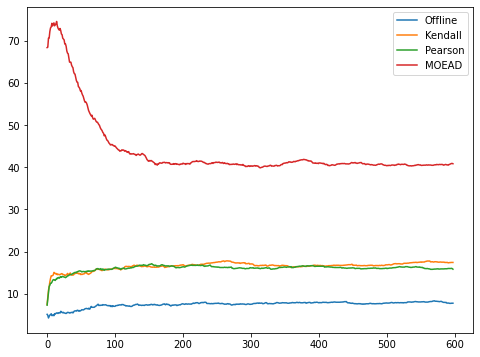

In [223]:
convergence = pd.DataFrame(data=[offline_r150.mean(),
                                 kendall_r150.mean(),
                                 pearson_r150.mean(),
                                 moead_r150.mean()]).T
convergence.columns='Offline Kendall Pearson MOEAD'.split()
convergence.plot(figsize=(8,6))
fig = plt.gcf()
plt.show()
fig.savefig(os.path.join(path, 'r150_number_of_solutions_convergence.pdf'), format=name.split('.')[1])

In [224]:
path

'/home/renansantos/Área de Trabalho/Doutorado/PhD_2019_01/PhD_2019_01/number_of_solutions/'

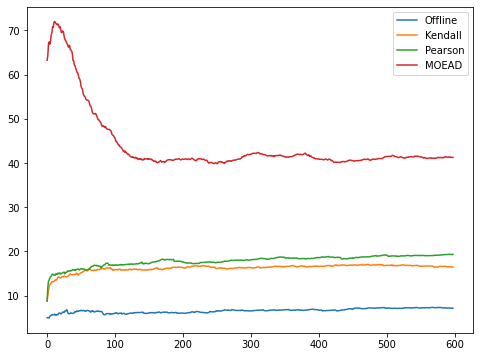

In [225]:
convergence = pd.DataFrame(data=[offline_r200.mean(),
                                 kendall_r200.mean(),
                                 pearson_r200.mean(),
                                 moead_r200.mean()]).T
convergence.columns='Offline Kendall Pearson MOEAD'.split()
convergence.plot(figsize=(8,6))
fig = plt.gcf()
plt.show()
fig.savefig(os.path.join(path, 'r200_number_of_solutions_convergence.pdf'), format=name.split('.')[1])